In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sb
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score

In [ ]:
df=pd.DataFrame(pd.read_csv("placement.csv"))
df.head()

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


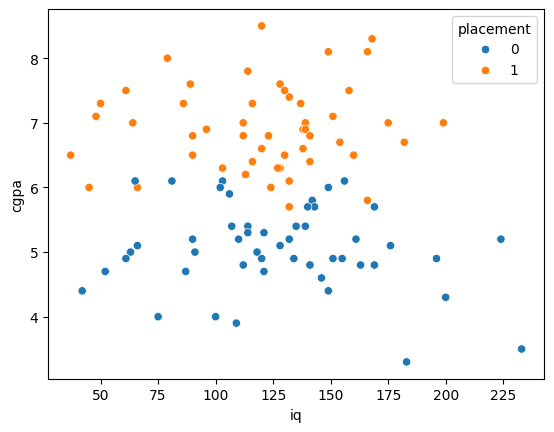

In [3]:
sb.scatterplot(x=df["iq"],y=df["cgpa"],hue=df["placement"])
mat.show()

In [5]:
x=df.iloc[:,:-1]
y=df["placement"]

In [65]:
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [77]:
x

,cgpa,iq
0,0.710958,-0.014593
1,-0.079972,-0.442331
2,-0.607258,-0.064915
3,1.238245,0.211856
4,-0.167853,0.463466
...,...,...
95,-1.486069,1.922807
96,-1.398188,-2.052638
97,0.623077,1.469908
98,0.271553,-0.517814


In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=55)

In [72]:
from sklearn.svm import SVC

In [73]:
sv=SVC(kernel="linear")
sv.fit(x_train,y_train)

SVC(kernel='linear')

In [74]:
sv.score(x_test,y_test)

0.9

In [75]:
sv.score(x_train,y_train)

0.925

c:\Users\huzef\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


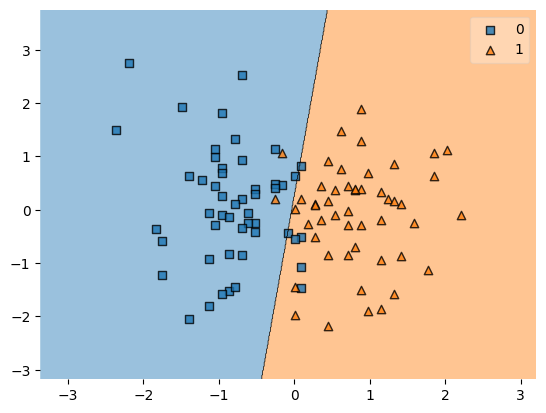

In [76]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=sv)
mat.show()

Regression

In [79]:
ds=pd.DataFrame(pd.read_excel("E:\\Study\\AIDS\\DS\\ML\\CGPA_vs_Package_Dataset.xlsx"))
ds.head()

,CGPA,Package (LPA)
0,6.0,3.0
1,6.1,3.5
2,6.2,4.0
3,6.3,4.5
4,6.4,5.0


In [80]:
ds.isnull().sum()

CGPA             0
Package (LPA)    0
dtype: int64

In [97]:
x=ds[["CGPA"]]
y=ds[["Package (LPA)"]]

In [98]:
from sklearn.svm import SVR

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [128]:
svr=SVR(kernel="linear")
svr.fit(x_train,y_train)

c:\Users\huzef\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [129]:
svr.score(x_test,y_test)

0.9998669332745289

In [130]:
svr.score(x_train,y_train)

0.9998764400581679

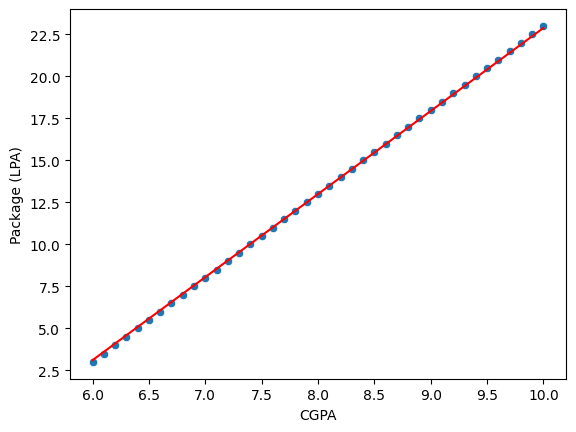

In [131]:
sb.scatterplot(x=ds["CGPA"],y=ds["Package (LPA)"])
mat.plot(ds["CGPA"],svr.predict(x),color="red")
mat.show()